<a href="https://www.kaggle.com/code/heemalichaudhari/finding-if-alcohol-affects-success?scriptVersionId=115545228" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualize
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

student-alcohol-consumption



In [2]:
data = pd.read_csv('/kaggle/input/student-alcohol-consumption/student-mat.csv')

In [3]:
# I use final grade = G3, and weekly alcohol consumption = Dalc + Walc 
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# Correlation between features

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'Medu'),
  Text(0, 2.5, 'Fedu'),
  Text(0, 3.5, 'traveltime'),
  Text(0, 4.5, 'studytime'),
  Text(0, 5.5, 'failures'),
  Text(0, 6.5, 'famrel'),
  Text(0, 7.5, 'freetime'),
  Text(0, 8.5, 'goout'),
  Text(0, 9.5, 'Dalc'),
  Text(0, 10.5, 'Walc'),
  Text(0, 11.5, 'health'),
  Text(0, 12.5, 'absences'),
  Text(0, 13.5, 'G1'),
  Text(0, 14.5, 'G2'),
  Text(0, 15.5, 'G3')])

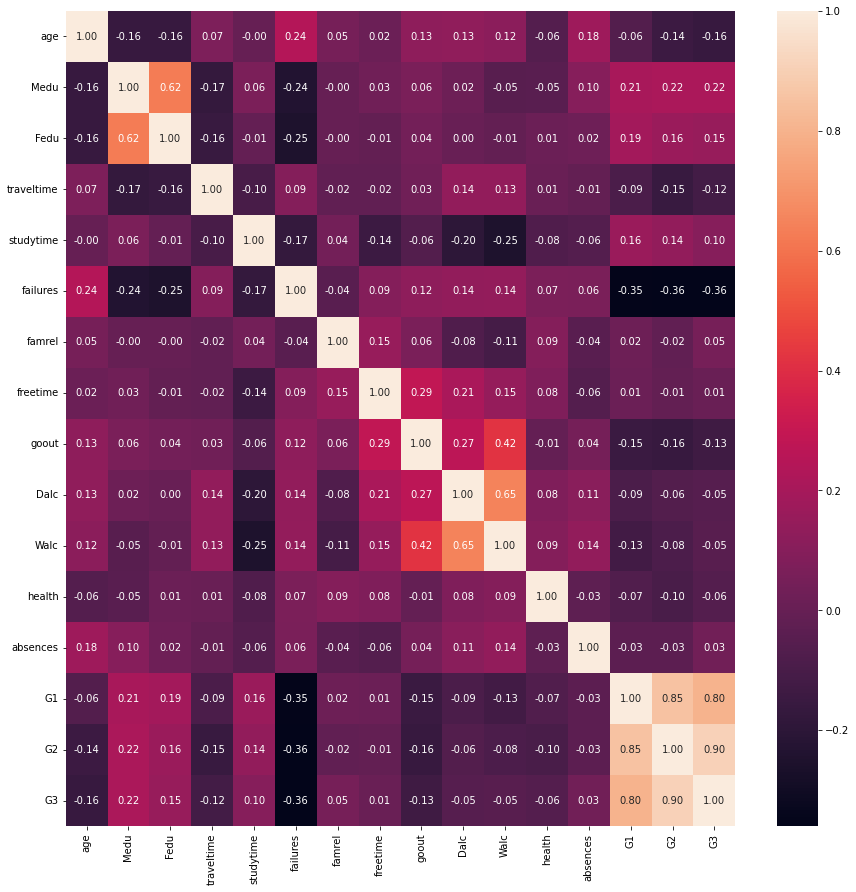

In [4]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

As it can be seen from correlation map only exam scoreas are highly correlated with each other. It says that if students takes almost same grade at each exams.

In [5]:
data['Dalc'] = data['Dalc'] + data['Walc']

# Weekly Consumption of Alcohol

Students drink alcohol at least 2 times in a week.

Text(0.5, 0, 'Weekly alcohol consumption')

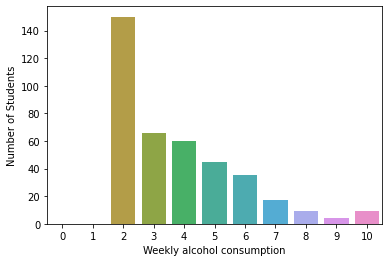

In [6]:
# There is no student who does not consume alcohol. However, all students at least 2 times in a week consume alcohol.
list = []
for i in range(11):
    list.append(len(data[data.Dalc == i]))
ax = sns.barplot(x = [0,1,2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Number of Students')
plt.xlabel('Weekly alcohol consumption')

### Final Exam Scores According to Students' alcohol consumption

Text(0.5, 0, 'Students grade distribution according to weekly alcohol consumption')

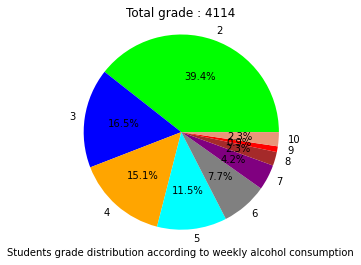

In [7]:
labels = ['2','3','4','5','6','7','8','9','10']
colors = ['lime','blue','orange','cyan','grey','purple','brown','red','darksalmon']
explode = [0,0,0,0,0,0,0,0,0]
sizes = []
for i in range(2,11):
    sizes.append(sum(data[data.Dalc == i].G3))
total_grade = sum(sizes)
average = total_grade/float(len(data))
plt.pie(sizes,explode=explode,colors=colors,labels=labels,autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Total grade : '+str(total_grade))
plt.xlabel('Students grade distribution according to weekly alcohol consumption')

#### Well, it looks like students who consume alcohol 2 times in a week more successful than others. However, it actually cannot be understood from this graph. Because number of students who consume alcohol 2 times in a week more than others. Therefore, lets look at swarm plot to understand whether alcohol affects the success or not.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 52.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; yo

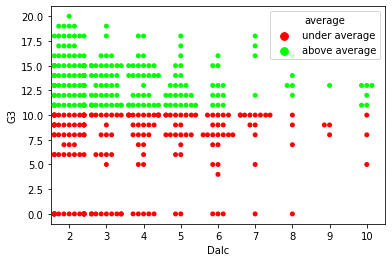

In [8]:
ave = sum(data.G3)/float(len(data))
data['ave_line'] = ave
data['average'] = ['above average' if i > ave else 'under average' for i in data.G3]
sns.swarmplot(x='Dalc', y = 'G3', hue = 'average',data= data,palette={'above average':'lime', 'under average': 'red'})
plt.savefig('graph.png')

In [9]:
sum(data[data.Dalc == 2].G3)/float(len(data[data.Dalc == 2]))

10.806666666666667

Text(0.5, 0, 'Weekly alcohol consumption')

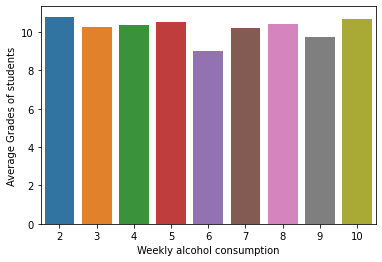

In [10]:
# Average grade
list = []
for i in range(2,11):
    list.append(sum(data[data.Dalc == i].G3)/float(len(data[data.Dalc == i])))
ax = sns.barplot(x = [2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Average Grades of students')
plt.xlabel('Weekly alcohol consumption')